# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modeling (start with a few classifiers)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



## Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv('ExtraaLearn.csv')
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [3]:
print(df.shape) #(rows, columns)
df.info() #shows data types

(4612, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64 

In [4]:
#check for missing values
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

****There are no missing values****

In [5]:
#summary of the data statistics
df.describe(include = 'all')

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612,4612.000000,4612,4612,4612,4612.000000,4612.000000,4612.000000,4612,4612,4612,4612,4612,4612,4612.000000
unique,4612,NaN,3,2,3,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,EXT4612,NaN,Professional,Website,High,NaN,NaN,NaN,Email Activity,No,No,No,No,No,NaN
freq,1,NaN,2616,2542,2264,NaN,NaN,NaN,2278,4115,4379,4085,3907,4519,NaN
mean,NaN,46.201214,NaN,NaN,NaN,3.566782,724.011275,3.026126,NaN,NaN,NaN,NaN,NaN,NaN,0.298569
std,NaN,13.161454,NaN,NaN,NaN,2.829134,743.828683,1.968125,NaN,NaN,NaN,NaN,NaN,NaN,0.457680
min,NaN,18.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,36.000000,NaN,NaN,NaN,2.000000,148.750000,2.077750,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,51.000000,NaN,NaN,NaN,3.000000,376.000000,2.792000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,57.000000,NaN,NaN,NaN,5.000000,1336.750000,3.756250,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
#shows the amounts of converted and non converted leads
df['status'].value_counts()


status
0    3235
1    1377
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [8]:
#dropping unnecessary columns
df = df.drop('ID', axis = 1)

In [9]:
#now we want to do some one-hot encoding so that we have 
#numerical data for our models
# Add to the list of columns to one-hot encode
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

#let's go ahead and get our number columns too
def get_numerical_columns(df, exclude_target=True, target_column='status'):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if exclude_target and target_column in num_cols:
        num_cols.remove(target_column)
    return num_cols

num_cols = get_numerical_columns(df)
cat_cols = get_categorical_columns(df)

df = pd.get_dummies(df, columns=cat_cols, drop_first = False)
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,1,False,False,True,False,True,...,False,True,True,False,False,True,True,False,True,False
1,56,2,83,0.320,0,True,False,False,True,False,...,True,False,True,False,True,False,False,True,True,False
2,52,3,330,0.074,0,True,False,False,False,True,...,True,False,True,False,False,True,True,False,True,False
3,53,4,464,2.057,1,False,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
4,23,4,600,16.914,0,False,True,False,False,True,...,True,False,True,False,True,False,True,False,True,False


In [10]:
#now we want to split our data
X = df.drop('status', axis =1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) 

## EDA

- It is a good idea to explore the data once again after manipulating it.

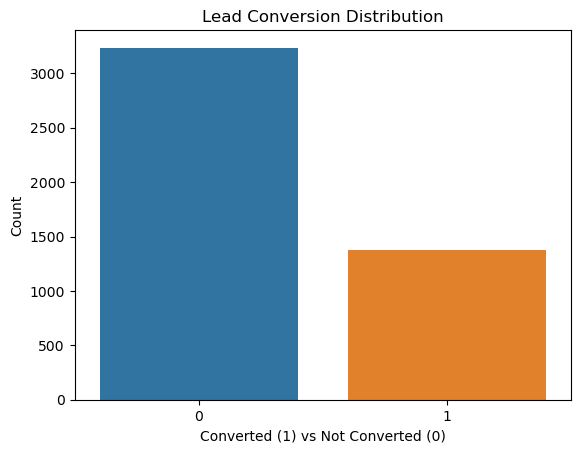

In [11]:
#we want to show the amount of people converted or not
sns.countplot(x='status', data=df)
plt.title('Lead Conversion Distribution')
plt.xlabel('Converted (1) vs Not Converted (0)')
plt.ylabel('Count')
plt.show()

In [33]:
df['status'].value_counts()

status
0    3235
1    1377
Name: count, dtype: int64

***As we can see, there are a lot more non converted than their are converted, with 3,235 non-converted leads and only 1,377 converted leads***

### Numerical Features vs Status

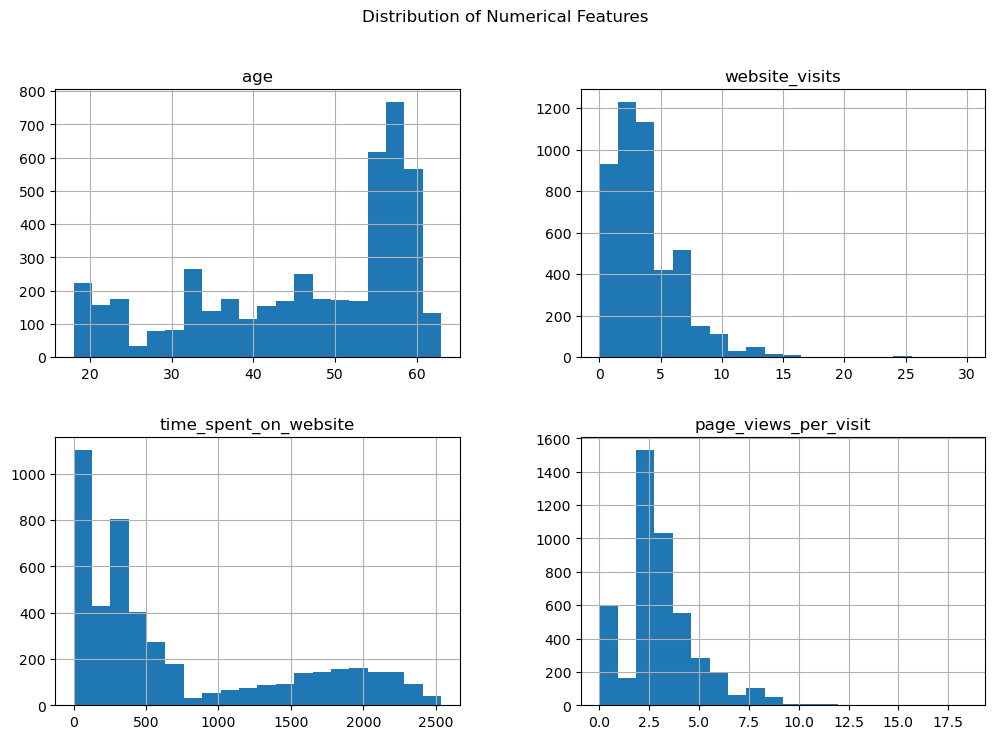

In [12]:
#We're gonna plot some histograms and boxplots for our numerical features
df[num_cols].hist(bins = 20, figsize = (12,8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

***the y-axis shows the amount of leads converted and the x-axis plots the title of the graph's name***

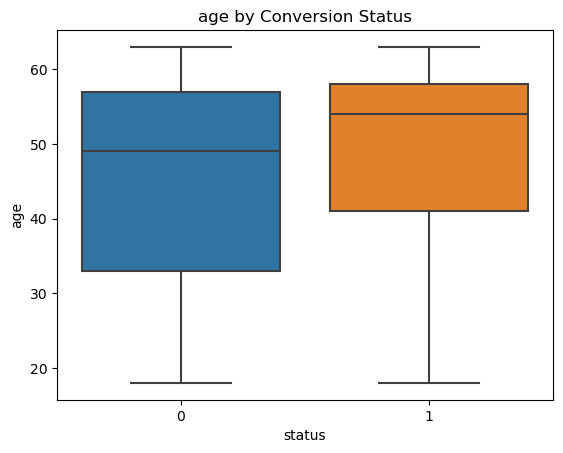

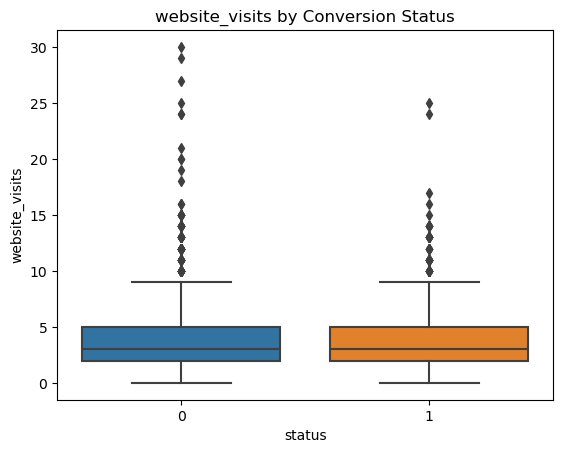

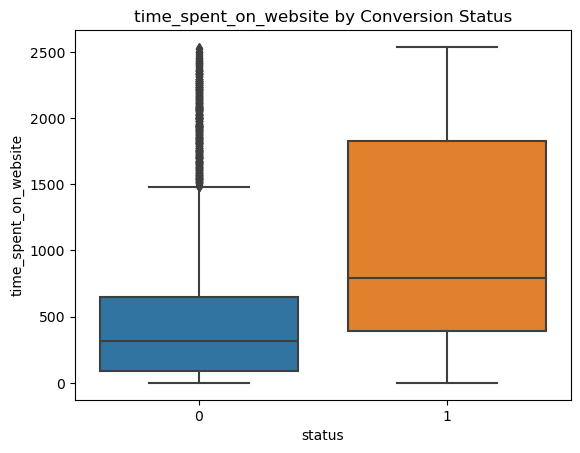

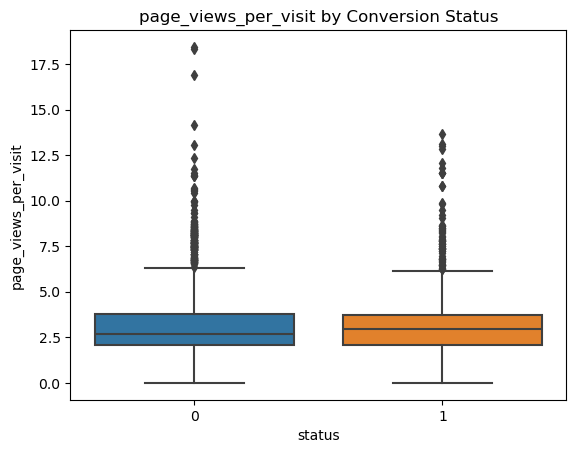

In [13]:
for col in num_cols:
    sns.boxplot(x = 'status', y=col, data = df)
    plt.title(f'{col} by Conversion Status')
    plt.show()

* ***people who ranged from about 55-60 years old had a lot more converted leads than those who were older or younger***
* ***Those who visited the website less actually had more converted leads than those who visited the website more frequently***
* ***Those who spent less time on the website actually had more converted leads than those who spent more time on the website***
* ***Those who visited about 2.5 pages had more converted leads than any other number***

### Correlation Heatmap

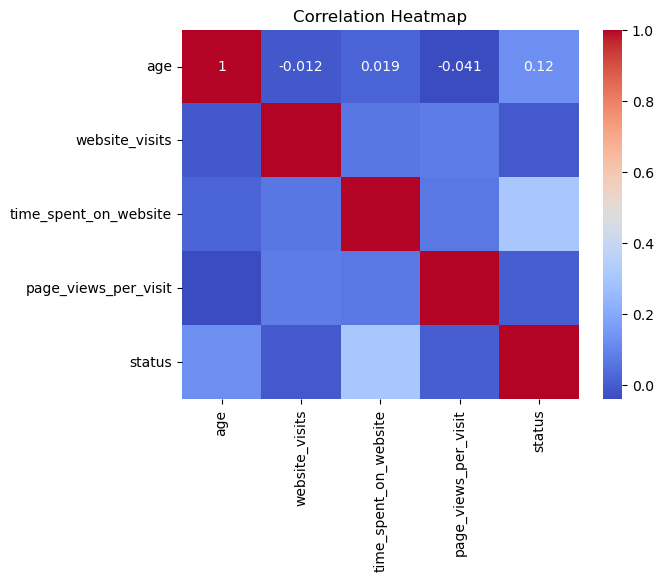

In [32]:
sns.heatmap(df[num_cols + ['status']].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* ***There tends to be little to no correlation between any of our numerical features, however the most correlated would be the time spent on a website and status***

### Categorical Features vs Status

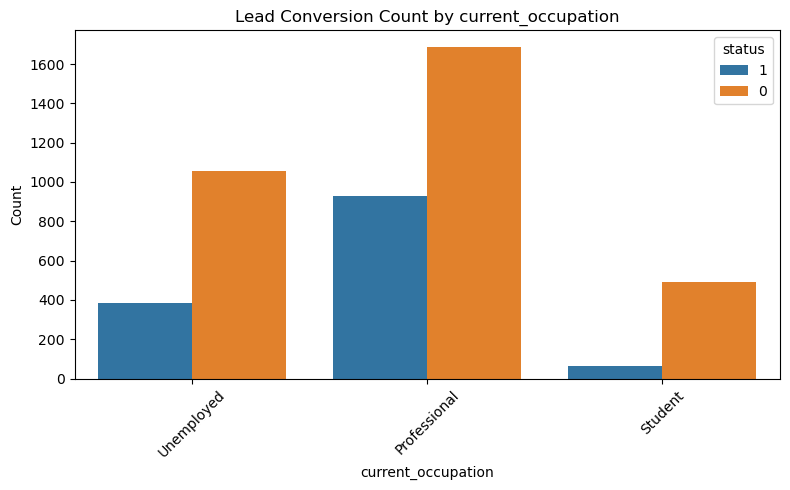

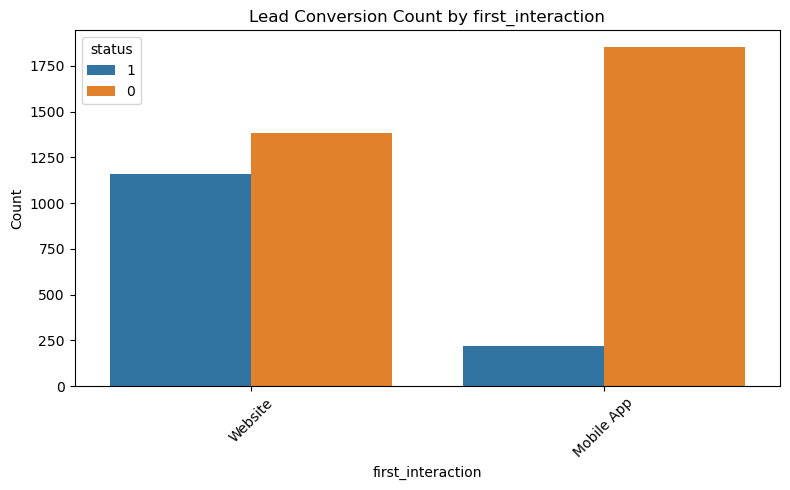

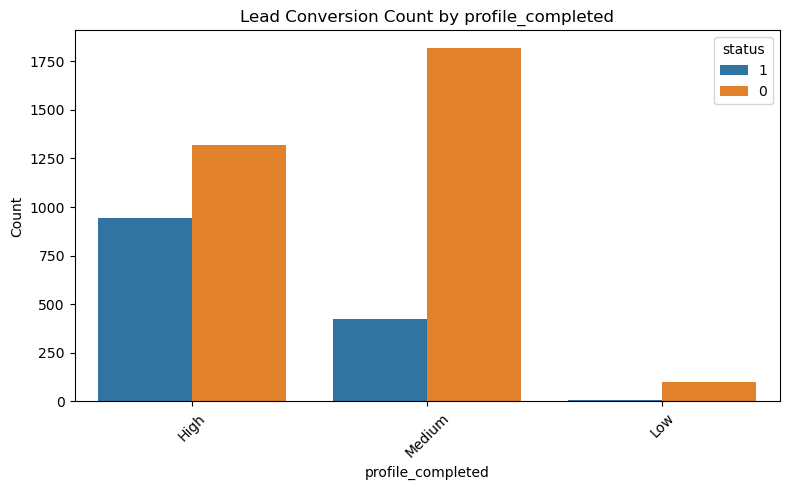

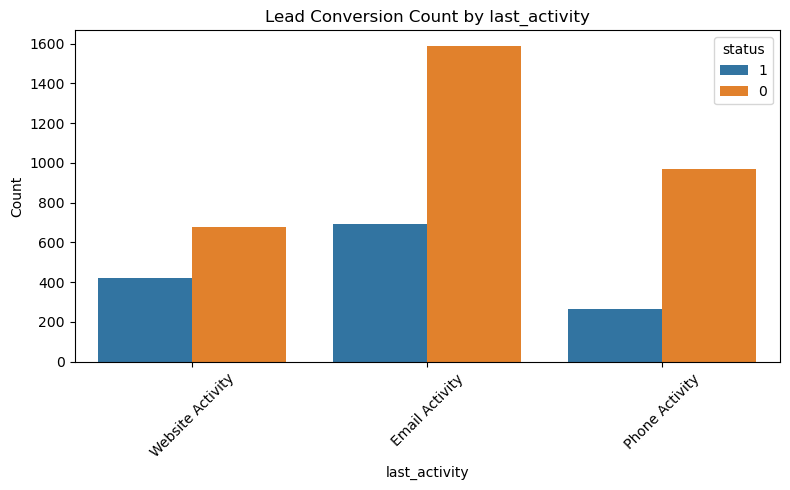

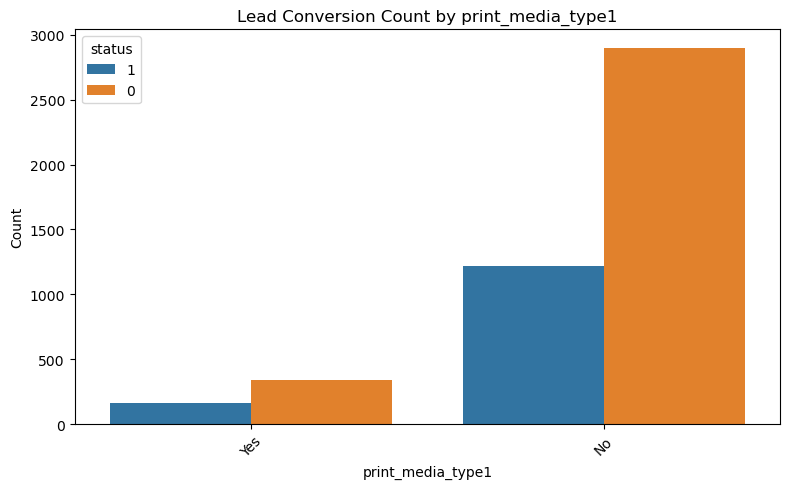

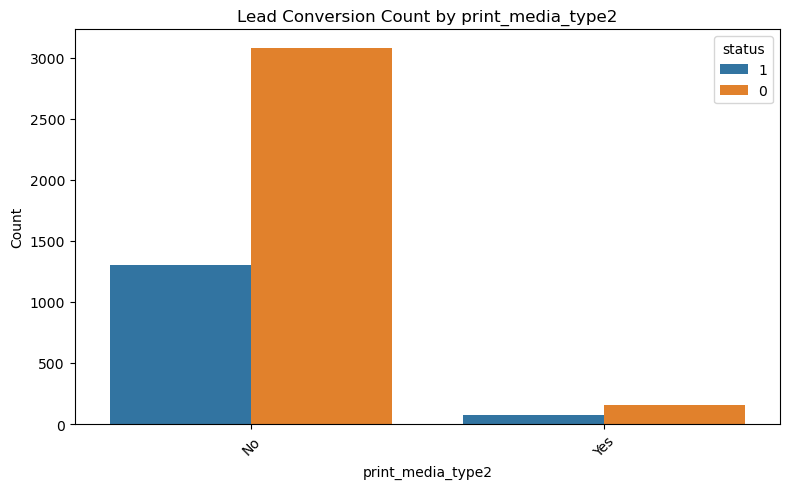

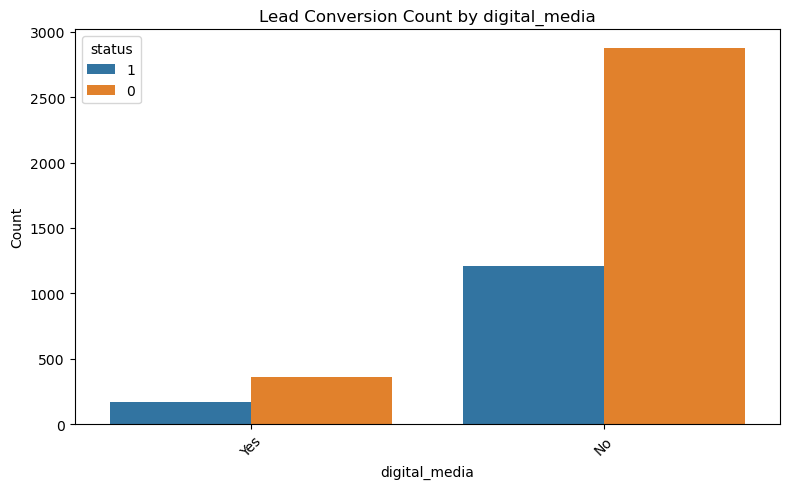

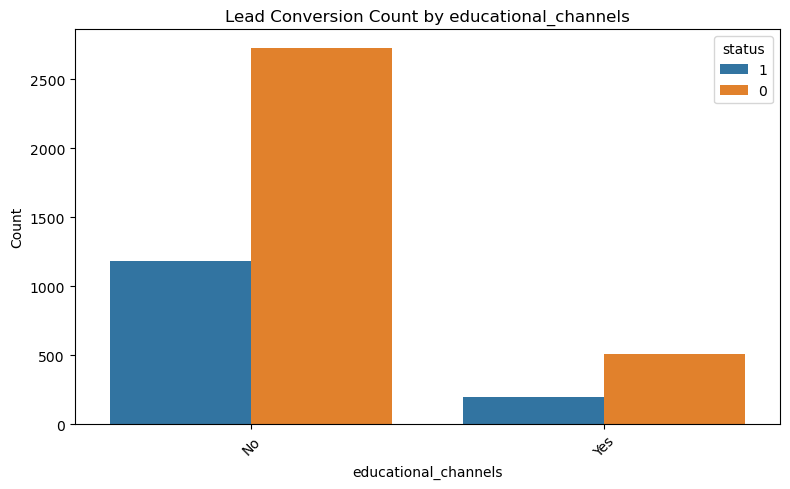

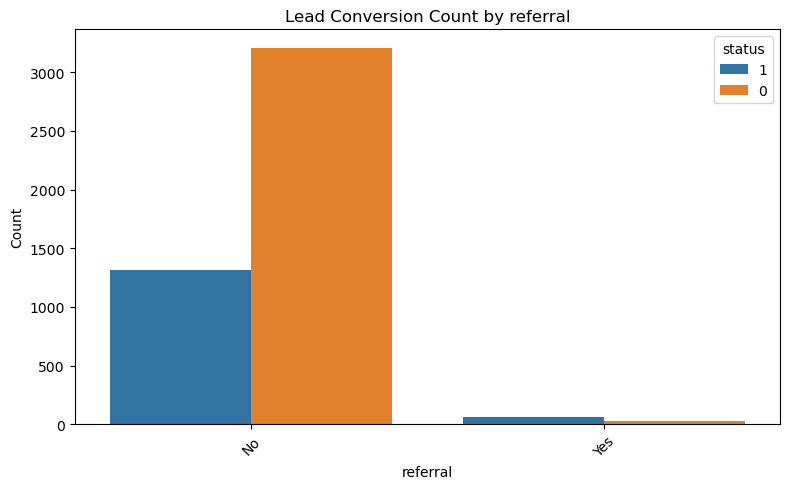

In [23]:
old_df = pd.read_csv('ExtraaLearn.csv')
old_df = old_df.drop('ID', axis = 1)

cat_cols = get_categorical_columns(old_df)

old_df['status'] = old_df['status'].astype(str)

for col in cat_cols:
    plt.figure(figsize = (8,5))
    sns.countplot(x = col, hue = 'status', data = old_df)
    plt.title(f'Lead Conversion Count by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()


In [29]:
print(old_df['educational_channels'].value_counts())
old_df['referral'].value_counts()

educational_channels
No     3907
Yes     705
Name: count, dtype: int64


referral
No     4519
Yes      93
Name: count, dtype: int64

* ***Professionals had the highest conversion rate and the highest population in the data set while students had the lowest conversion rate and the lowest population in the data set***
* ***Those who had their first interactions through the website tend to have a higher conversion rate than those who had their first interactions through a mobile phone***
* ***Those with high profile completion (75-100%) have the highest amount of converted leads, and those with low profile completion (0-50%) have had little to none converted leads***
* ***More of the population's last interaction with ExtraaLearn was through email rather than through phone or website, and email activity has had the most converted leads***
* ***Most of the population hadn't seen the ad of ExtraaLearn that was in the Newspaper or in the magazine, as most of the people who had seen any ads saw the ad through a digital platform***
* ***A little more than 700 people heard about ExtraaLearn through educational channels, while only 93 heard about it through referrals.***  

## Building a Decision Tree model

In [34]:
#Now it's time to build a decision tree model
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
#let's evaluate the model
y_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[554  93]
 [ 86 190]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       647
           1       0.67      0.69      0.68       276

    accuracy                           0.81       923
   macro avg       0.77      0.77      0.77       923
weighted avg       0.81      0.81      0.81       923



* ***As we can see, our model correctly predicted 554 true negatives, 190 true positives, 93 false positives, and 86 false negatives.***
* ***Of all predicted not converted, 87% were correct***
* ***Of all predicted converted, 67% were correct***
* ***Overall, our predictions for our non converted were better than our predictons for converted, with non-converted having an f1-score of .86 and converted having an f1-score of .68***

## Do we need to prune the tree?

In [40]:
#now we want to see if we need to prune our tree using GridSearchV
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3,5,10,None],
              'min_samples_split':[2,5,10],
              'min_samples_leaf': [1, 2, 5],
              'criterion': ['gini', 'entropy']
             }

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring='f1',       # can also use 'accuracy' or 'f1_macro'
                           cv=5,               # 5-fold cross-validation
                           n_jobs=-1,          # run in parallel
                           verbose=1)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [54]:
print( 'Best Parameters:', grid_search.best_params_)
best_tree = grid_search.best_estimator_

y_pred_best = best_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
[[554  93]
 [ 86 190]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       647
           1       0.67      0.69      0.68       276

    accuracy                           0.81       923
   macro avg       0.77      0.77      0.77       923
weighted avg       0.81      0.81      0.81       923



* ***Our f1-scores actually remained the same, with our classification report remaining pretty similar***
* ***Our confusion Matrix remained the same***
* ***After using GridSearchV, we can see that:***
1. *Our best impurity to use was gini impurity (how mixed the classes are in a node)*
2. *The minimum number of samples required at each leaf was 1 (no pruning at the leaves)*
3. *The minimum number of samples required to split an internal node was 10*

## Building a Random Forest model

In [43]:
#Now let's build a random forest model
rf_model = RandomForestClassifier( n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred_rf = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[591  56]
 [ 76 200]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       647
           1       0.78      0.72      0.75       276

    accuracy                           0.86       923
   macro avg       0.83      0.82      0.83       923
weighted avg       0.85      0.86      0.86       923



* *Compared to our Decision Tree model, our Random Forest model performed better, with an improved f1-score, for both non-converted and converted*
* In addition, our accuracy improved from 81% to 86%, still leaving some room for improvement.

## Do we need to prune the tree?

In [47]:
#Let's use GridSearchCV again, for this model
rf_param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',         # Use 'f1' to prioritize conversion class
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [48]:
best_rf = grid_search_rf.best_estimator_
print("Best parameters:", grid_search_rf.best_params_)

y_pred_best_rf = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
[[601  46]
 [ 72 204]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       647
           1       0.82      0.74      0.78       276

    accuracy                           0.87       923
   macro avg       0.85      0.83      0.84       923
weighted avg       0.87      0.87      0.87       923



* Based off the confusion matrix, we can see that our scores for true positives and negatives improved after getting our best Random Forest model, with our model now predicting 601 True positives and 204 True Negatives
* Our accuracy improved by 1%
* *As we can see, our f1-score for both non converted and converted both improved, with converting improving more*
1. Our best impurity to use was information gain
2. Our max depth was 10
3. Our minimum samples was 1
4. Our minimum samples split was 2

## Actionable Insights and Recommendations

In [53]:
#Before we make any recommendations, lets see the most important features
feature_importances = pd.DataFrame({'Feature':X_train.columns, 'Importance': best_rf.feature_importances_}).sort_values(by = 'Importance', ascending = False)
feature_importances.head(10)

,Feature,Importance
2,time_spent_on_website,0.250122
8,first_interaction_Website,0.121714
7,first_interaction_Mobile App,0.114940
9,profile_completed_High,0.080814
0,age,0.066976
11,profile_completed_Medium,0.060301
3,page_views_per_visit,0.056984
1,website_visits,0.038519
13,last_activity_Phone Activity,0.035358
4,current_occupation_Professional,0.033468


### Recommendations
1. Leads labeled as Professionals have the highest conversion rates, so ExtraaLearn should prioritize targeted campaigns to professionals instead of students or unemployed users.
2. Since first interaction through website proved to have more converts, ExtraaLearn should invest in improving their website experience as a whole over improving mobile apps.
3. Since Email-based last interactions have had more converted leads, ExtraaLearn should focus on following up on campaigns through email rather than through the phone or website.
4. Since those with high profile completion had a higher rate of conversion than medium or low, ExtraaLearn should push users to complete their profiles.
5. Digital platforms and educational channels drove the most conversions, so ExtraaLearn should shift their marketing spend from print and/or referrals to digital media and educational platforms.
6. Users who had moderate page visits tended to convert more, so ExtraaLearn should prioritize landing pages.
7. The most important features on conversion proved to be the user's time spent on websites, the user's first interactions, the percent of profile completed, and the users age, so ExtraaLearn should focus on prioritizing these features in the future.